In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import mpl
import seaborn as sns
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

In [2]:
Kf1 = np.array([0.8974359 , 0.76315789 , 0.84210526 , 0.89473684 , 0.78947368])
Kf2 = np.array([0.92307692 , 0.76315789 , 0.86842105 , 0.89473684 , 0.78947368])

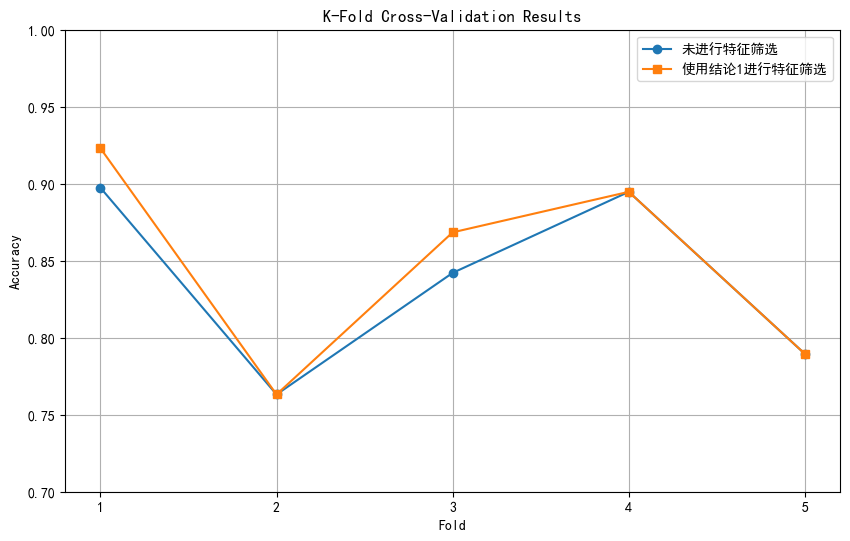

In [6]:
# Given K-fold data
Kf1 = np.array([0.8974359, 0.76315789, 0.84210526, 0.89473684, 0.78947368])
Kf2 = np.array([0.92307692, 0.76315789, 0.86842105, 0.89473684, 0.78947368])

# Number of folds
folds = np.arange(1, 6)

# Plotting the K-fold data
plt.figure(figsize=(10, 6))
plt.plot(folds, Kf1, marker='o', linestyle='-', label='未进行特征筛选')
plt.plot(folds, Kf2, marker='s', linestyle='-', label='使用结论1进行特征筛选')

# Adding titles and labels
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.ylim(0.7, 1.0)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [30]:
from collections import defaultdict

feat_visual = pd.read_csv("outputs/feat_visual.csv")
prefix_sum_count = defaultdict(lambda: [0, 0])

# 计算每个前缀的总和和计数
for index, row in feat_visual.iterrows():
    prefix = row["Name"]
    importance = row["Importance"]
    prefix_sum_count[prefix][0] += importance
    prefix_sum_count[prefix][1] += 1

# 创建新的列表存储结果
results = []

# 计算平均值并存储结果
for prefix, (total_sum, count) in prefix_sum_count.items():
    average_importance = total_sum / count
    results.append({"Name": prefix, "Importance": average_importance})

# 创建新的 DataFrame
average_df = pd.DataFrame(results)
average_df.set_index('Name', inplace=True)
average_df

,Importance
Name,
脑脊液生化(检)-葡萄糖[Glu],0.034673
脑脊液生化(检)-氯[CL],0.031278
脑脊液细胞学检查(检)-白细胞计数,0.021725
脑脊液生化(检)-微量蛋白[MTP],0.021208
脑脊液常规(检)-白细胞计数,0.016007
mr_nn,0.024758
脑脊液常规(检)-多个核细胞百分比,0.016469
脑脊液细胞学检查(检)-多个核细胞百分比,0.021041
脑脊液细胞学检查(检)-蛋白定性,0.004763


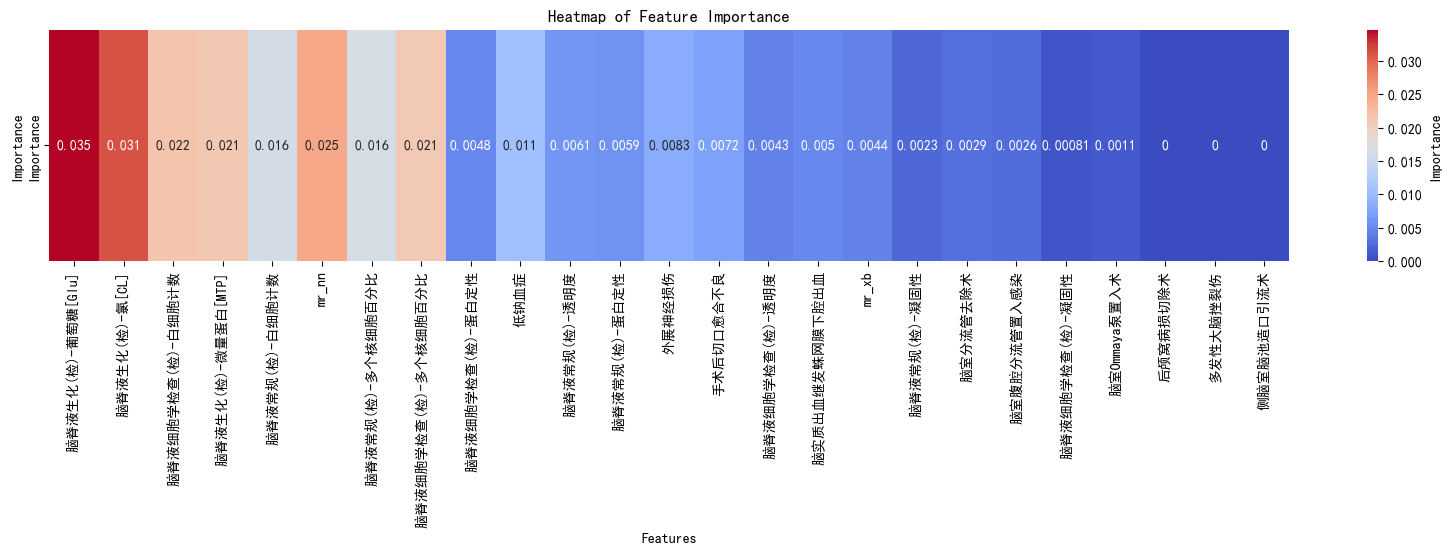

In [33]:
# 将名称列设置为索引


# 创建一个1行的DataFrame来适应heatmap格式
average_df = average_df.transpose()

# 绘制热图
plt.figure(figsize=(20, 3))
sns.heatmap(average_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Importance'})
plt.title('Heatmap of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.show()